# Lecture 4: Image segmentation

In [118]:
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 27.5 MB/s eta 0:00:00


In [221]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import exposure
from skimage import filters
from sklearn import cluster
from skimage import data
from skimage import segmentation
import pydicom
from skimage import morphology
from skimage.morphology import square, disk, diamond

In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
%cd drive/MyDrive/NECST/PiA/Lezione4/

[Errno 2] No such file or directory: 'drive/MyDrive/NECST/PiA/Lezione4/'
/content/drive/MyDrive/NECST/PiA/Lezione4


## Load images

In [197]:
cup = cv2.imread('images/Ciotola.jpeg')
cup_bad = cv2.imread('images/ciotola2.jpeg')
leaves = cv2.cvtColor(cv2.imread('images/leaves.jpg'), cv2.COLOR_BGR2RGB)
hand = cv2.imread('images/hand-x-ray.jpeg')

In [96]:
# check shapes and types
print(type(leaves))
print(leaves.shape)
print(type(cup))
print(cup.s shape)
print(type(cup_bad))
print(cup_bad.shape)
print(type(hand))
print(hand.shape)

<class 'numpy.ndarray'>
(5774, 4330, 3)
<class 'numpy.ndarray'>
(416, 460, 3)
<class 'numpy.ndarray'>
(378, 402, 3)
<class 'numpy.ndarray'>
(1920, 1597, 3)


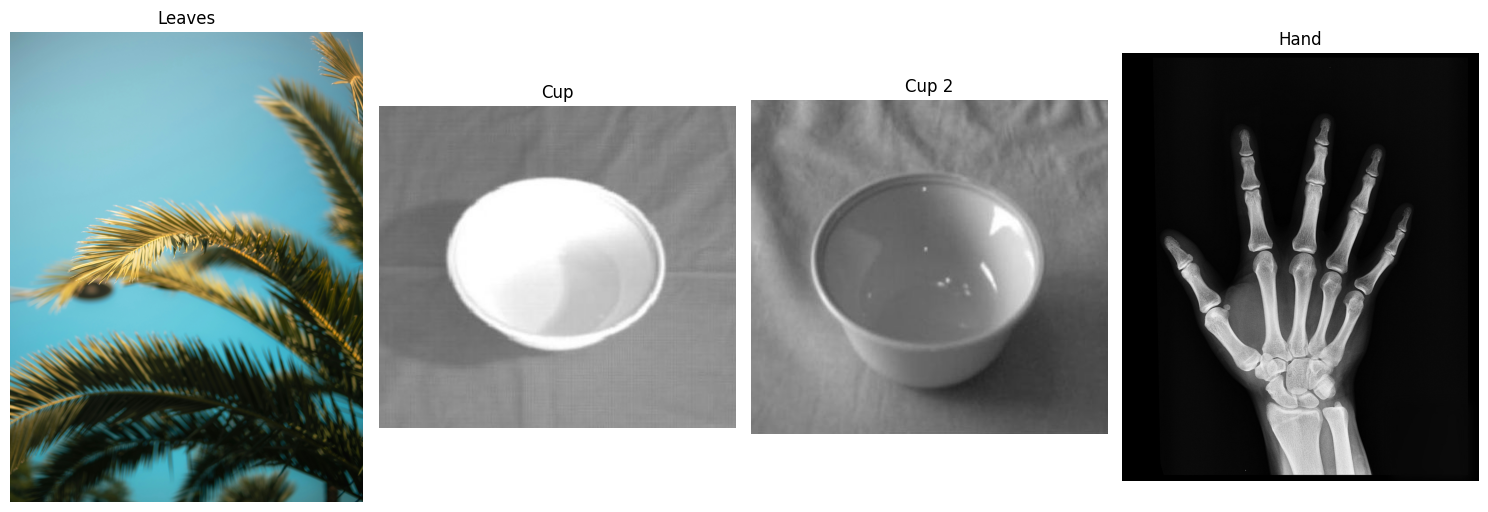

In [97]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(leaves)
plt.title('Leaves')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cup)
plt.title('Cup')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(cup_bad)
plt.title('Cup 2')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(hand)
plt.title('Hand')
plt.axis('off')


plt.tight_layout()
plt.show()

## Threshold-based segmentation

Text(0.5, 1.0, 'Image Histogram')

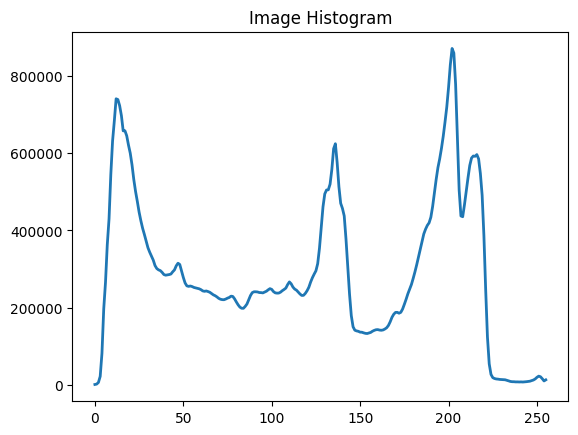

In [98]:
hist, bins_center = exposure.histogram(leaves)
plt.plot(bins_center, hist, lw=2)
plt.title('Image Histogram')

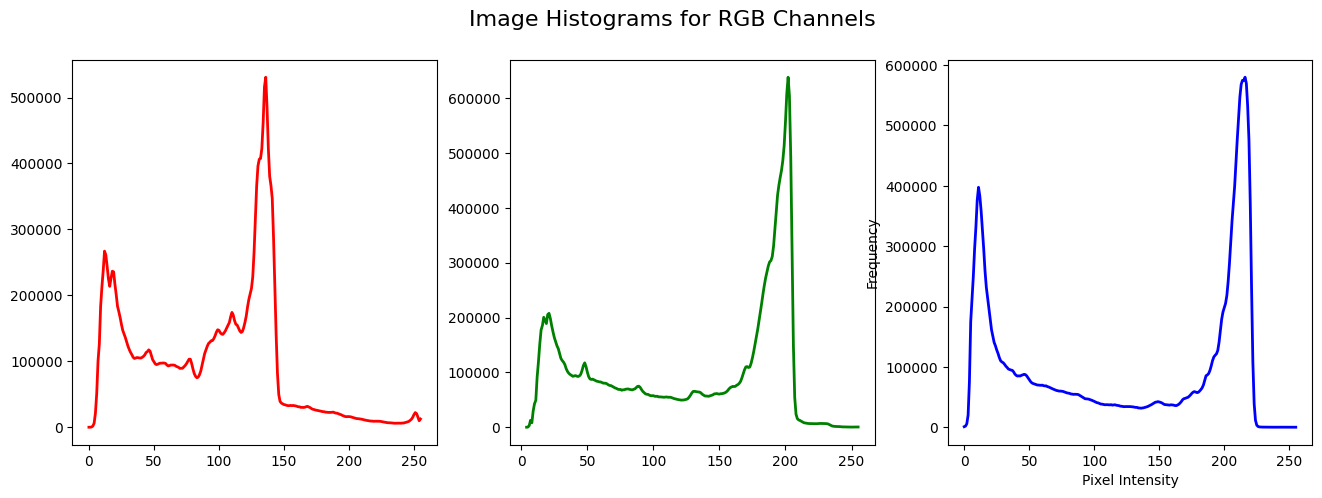

In [99]:
hist_r, bins_center_r = exposure.histogram(leaves[:,:,0])
hist_g, bins_center_g = exposure.histogram(leaves[:,:,1])
hist_b, bins_center_b = exposure.histogram(leaves[:,:,2])

plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
plt.plot(bins_center_r, hist_r, lw=2, color='red', label='Red Channel')
plt.subplot(1, 3, 2)
plt.plot(bins_center_g, hist_g, lw=2, color='green', label='Green Channel')
plt.subplot(1, 3, 3)
plt.plot(bins_center_b, hist_b, lw=2, color='blue', label='Blue Channel')

plt.suptitle('Image Histograms for RGB Channels', fontsize=16, ha='center')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

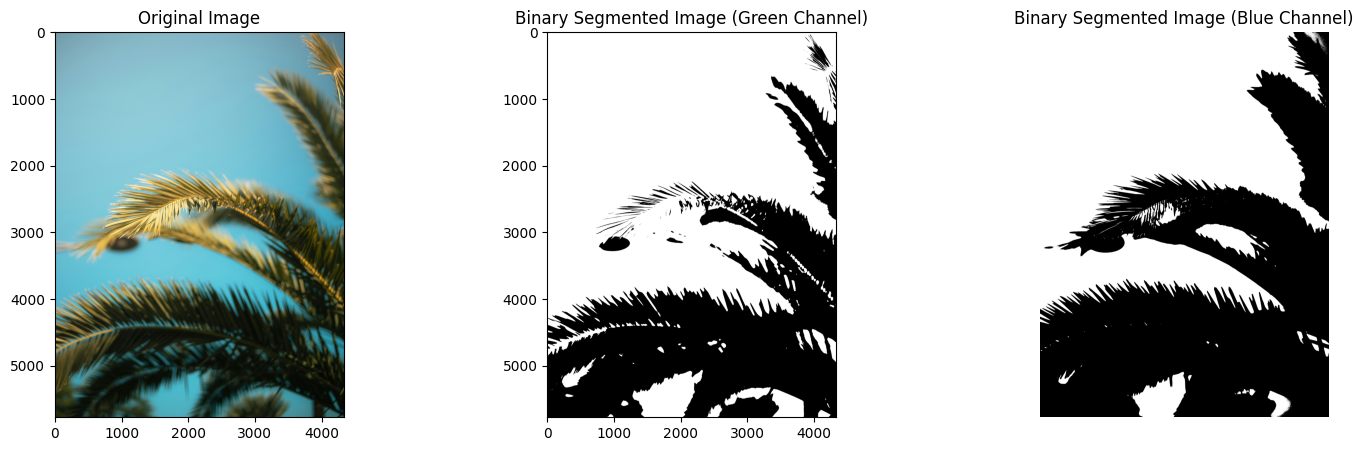

In [100]:
green_channel = leaves[:, :, 1]
blue_channel = leaves[:, :, 2]
threshold_g= 100
threshold_b= 150

binary_mask_g = (green_channel > threshold_g).astype(np.uint8) * 255

binary_mask_b = (blue_channel > threshold_b).astype(np.uint8) * 255

plt.figure(figsize = (18, 5))
plt.subplot(1, 3, 1)
plt.imshow(leaves)
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(binary_mask_g, cmap='gray')
plt.title("Binary Segmented Image (Green Channel)")
plt.subplot(1, 3, 3)
plt.imshow(binary_mask_b, cmap='gray')
plt.title("Binary Segmented Image (Blue Channel)")
plt.axis('off')
plt.show()


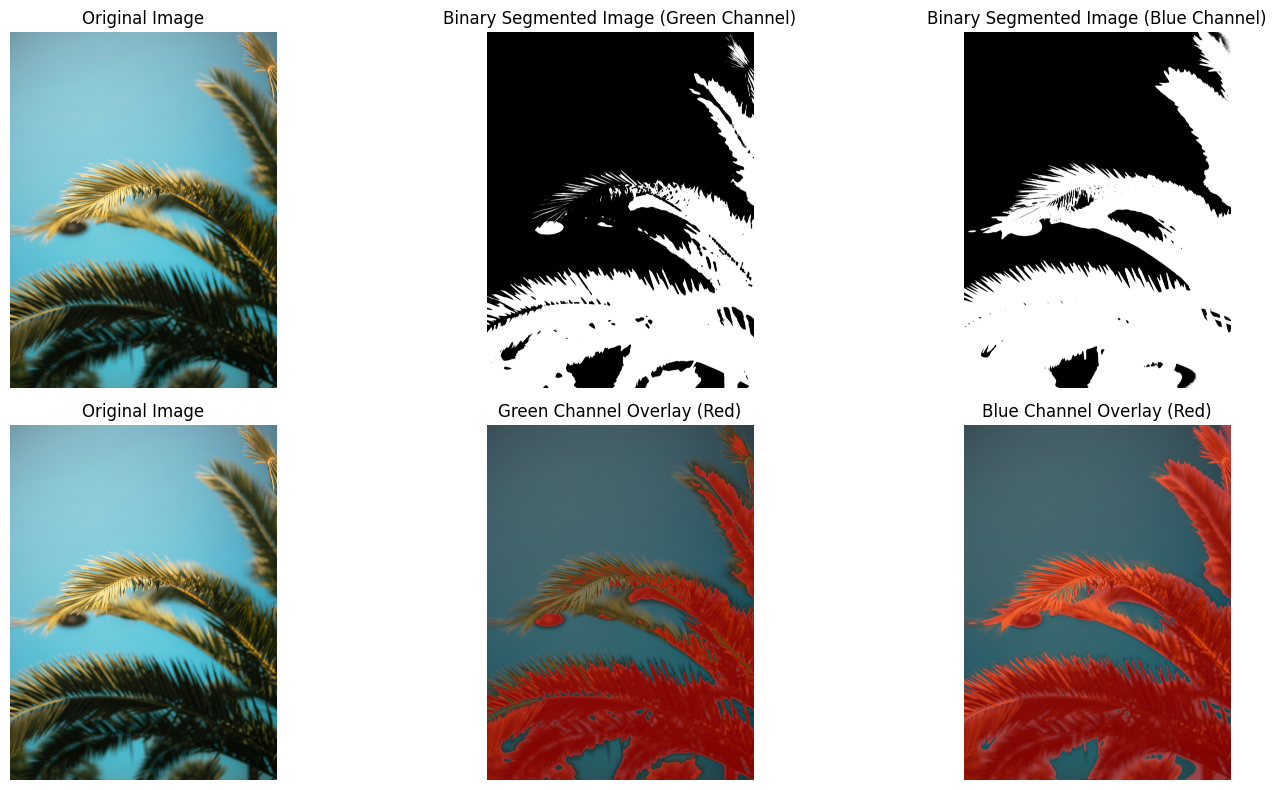

In [101]:
green_channel = leaves[:, :, 1]
blue_channel = leaves[:, :, 2]

threshold_g = 100
threshold_b = 150

binary_mask_g = (green_channel < threshold_g).astype(np.uint8) * 255
binary_mask_b = (blue_channel < threshold_b).astype(np.uint8) * 255
alpha = 0.5

overlay_g = np.zeros_like(leaves)
overlay_b = np.zeros_like(leaves)

overlay_g[binary_mask_g == 255] = [255, 0, 0]
overlay_b[binary_mask_b == 255] = [255, 0, 0]

plt.figure(figsize=(16, 8))

plt.subplot(2, 3, 1)
plt.imshow(leaves)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(binary_mask_g, cmap='gray')
plt.title("Binary Segmented Image (Green Channel)")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(binary_mask_b, cmap='gray')
plt.title("Binary Segmented Image (Blue Channel)")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(leaves)
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(leaves)
plt.imshow(overlay_g, alpha=alpha)
plt.title("Green Channel Overlay (Red)")
plt.axis('off')

combined_overlay = np.maximum(overlay_g, overlay_b)
plt.subplot(2, 3, 6)
plt.imshow(leaves)
plt.imshow(overlay_b, alpha=alpha)  # Combined red overlay
plt.title("Blue Channel Overlay (Red)")
plt.axis('off')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Image Histogram')

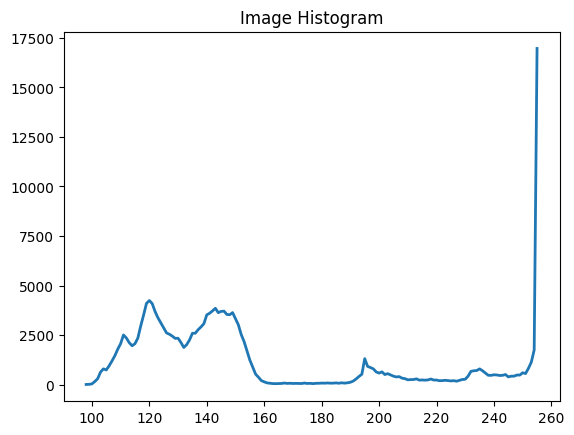

In [102]:
hist, bins_center = exposure.histogram(cup[:,:,0])
plt.plot(bins_center, hist, lw=2)
plt.title('Image Histogram')

In [103]:
cup_segmented = cup.copy()
cup_segmented[cup_segmented<=180] = 0
cup_segmented[cup_segmented > 180] = 255

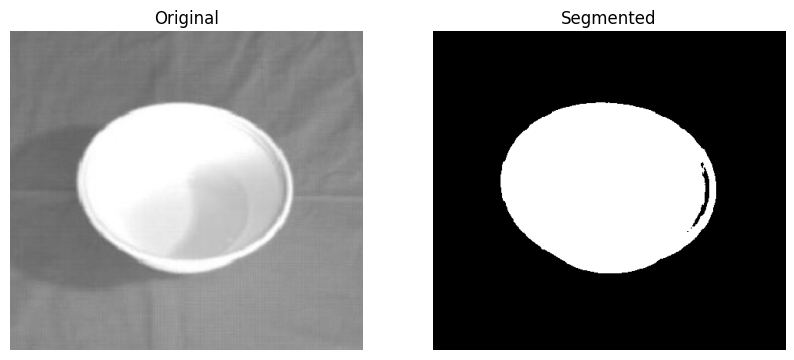

In [104]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cup)
plt.title("Original")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cup_segmented, cmap='gray')
plt.title("Segmented")
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'Image Histogram')

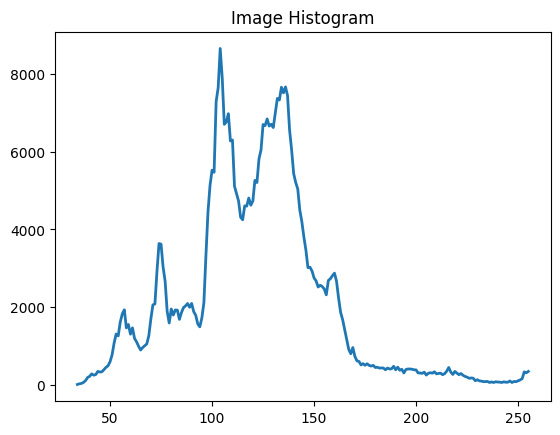

In [105]:
hist, bins_center = exposure.histogram(cup_bad)
plt.plot(bins_center, hist, lw=2)
plt.title('Image Histogram')

In [106]:
hist1 = np.copy(cup_bad)
hist1[hist1 <= 128] = 0
hist1[hist1 > 128] = 255

hist2 = np.copy(cup_bad)
hist2[hist2 <= 160] = 0
hist2[hist2 > 160] = 255

Text(0.5, 1.0, 'T = 160')

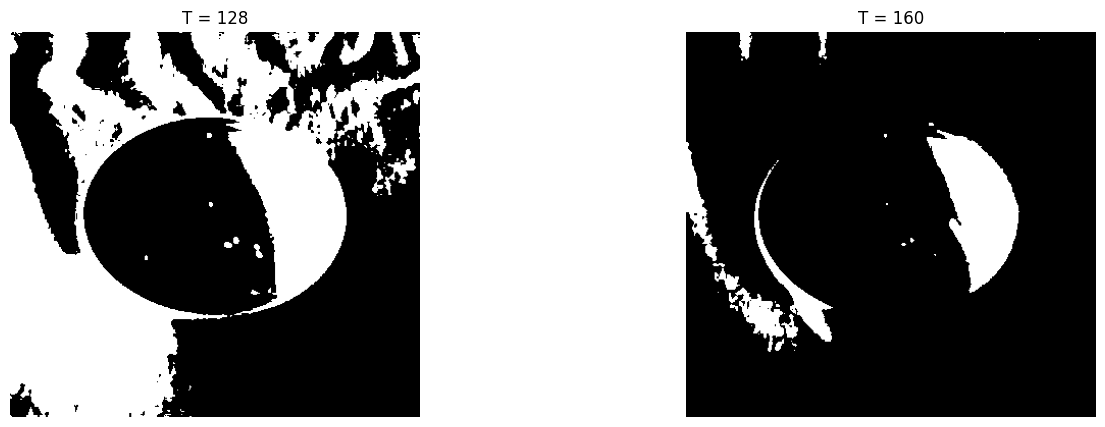

In [107]:
fig=plt.figure(figsize=(16,5))

fig.add_subplot(1,2,1)
plt.imshow(hist1)
plt.axis("off")
plt.title("T = 128")

fig.add_subplot(1,2,2)
plt.imshow(hist2)
plt.axis("off")
plt.title("T = 160")

Identifying a global threshold is really difficult, as the histogram is not bimodal. We can try with Otsu thresholding

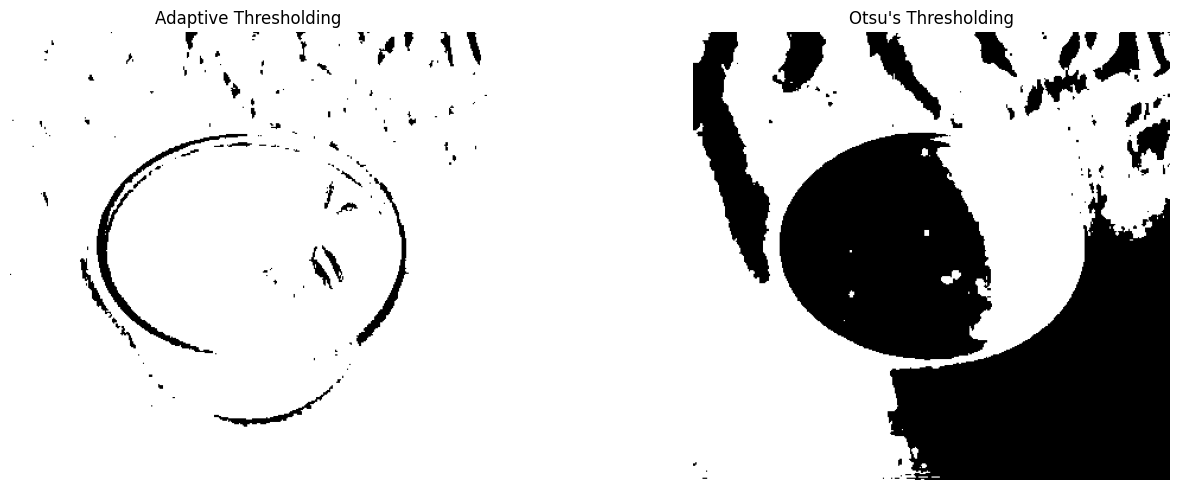

In [108]:
# adaptive thresholding
adaptive_threshold = cup_bad[:,:,0] > filters.threshold_local(cup_bad[:,:,0], block_size=35, offset=10)

#  Otsu's thresholding
otsu_threshold_value = filters.threshold_otsu(cup_bad[:,:,0])
otsu_threshold = cup_bad[:,:,0] > otsu_threshold_value


fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].imshow(adaptive_threshold, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Adaptive Thresholding')

axes[1].imshow(otsu_threshold, cmap='gray')
axes[1].axis('off')
axes[1].set_title("Otsu's Thresholding")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Image Histogram')

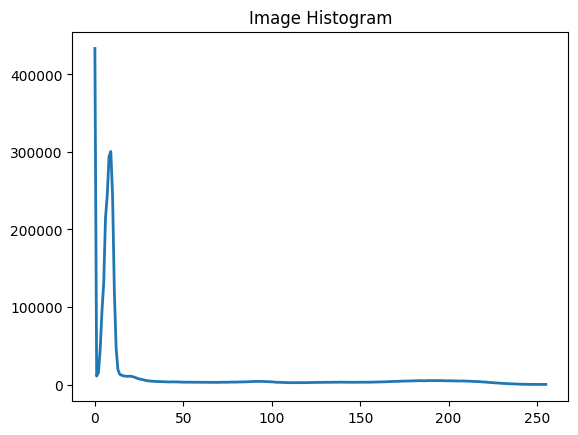

In [109]:
hist, bins_center = exposure.histogram(hand[:,:,0])
plt.plot(bins_center, hist, lw=2)
plt.title('Image Histogram')

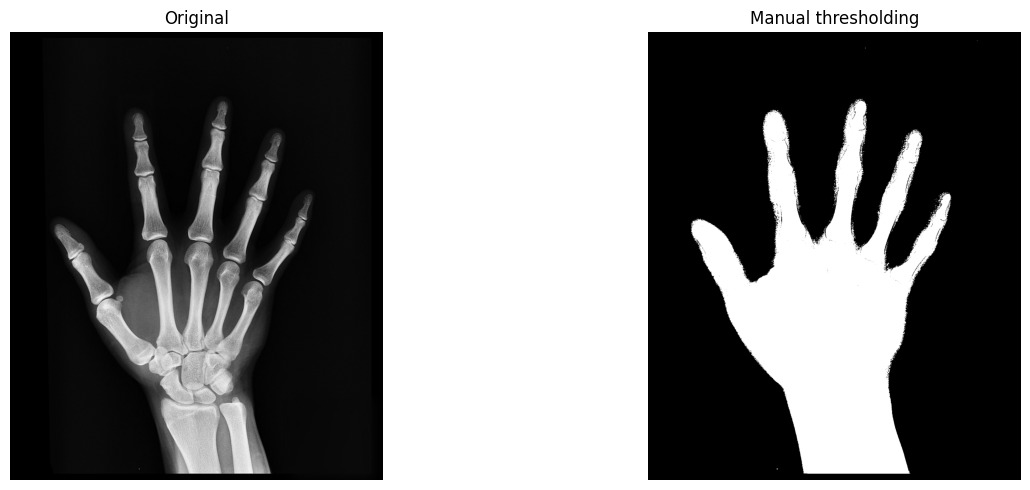

In [110]:
hist3 = np.copy(hand)
hist3[hist3<=20] = 0
hist3[hist3>20] = 255

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].imshow(hand, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original')

axes[1].imshow(hist3, cmap='gray')
axes[1].axis('off')
axes[1].set_title("Manual thresholding")

plt.tight_layout()
plt.show()

We can try with Otsu

In [111]:
thresholds = filters.threshold_otsu(hand[:,:,0])
print(thresholds)

87


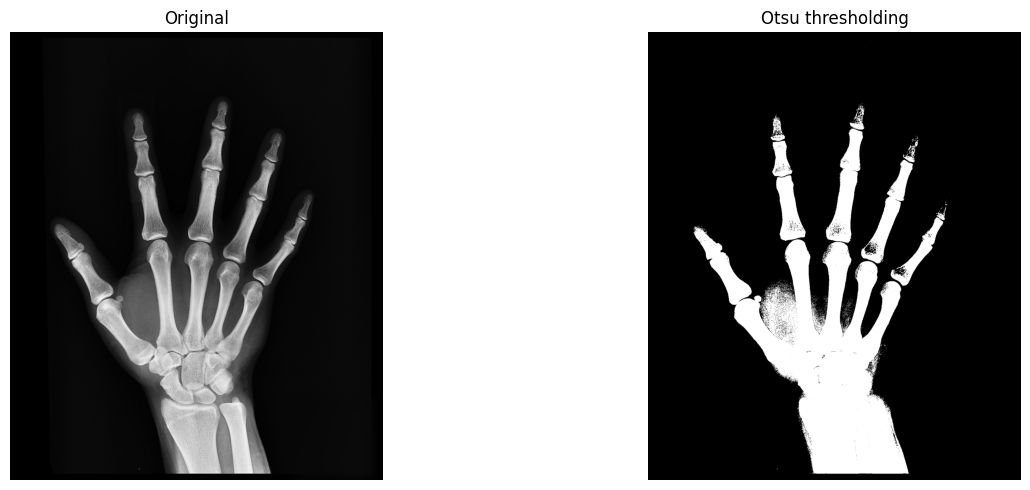

In [112]:
hand_otsu = np.copy(hand)
hand_otsu[hand_otsu<=thresholds] = 0
hand_otsu[hand_otsu>thresholds] = 255

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].imshow(hand, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original')

axes[1].imshow(hand_otsu, cmap='gray')
axes[1].axis('off')
axes[1].set_title("Otsu thresholding")

plt.tight_layout()
plt.show()

Otsu is implemennted inn OpenCV too

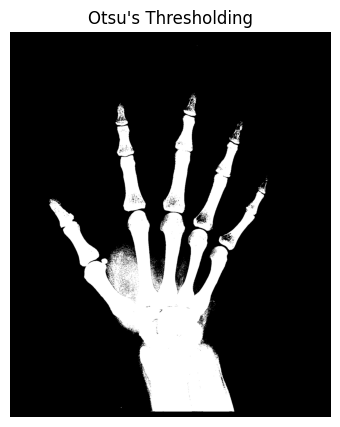

In [116]:
th, thresh_otsu = cv2.threshold(hand[:,:,0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(5,5))
plt.imshow(thresh_otsu, cmap='gray')
plt.title("Otsu's Thresholding")
plt.axis('off')
plt.show()

In [117]:
print(th)

87.0


### K-means clustering

 Load image

In [120]:
ct = pydicom.dcmread('images/2/IMG-0010-00032.dcm')
ct_img = ct.pixel_array # extract the matrix containing pixel data

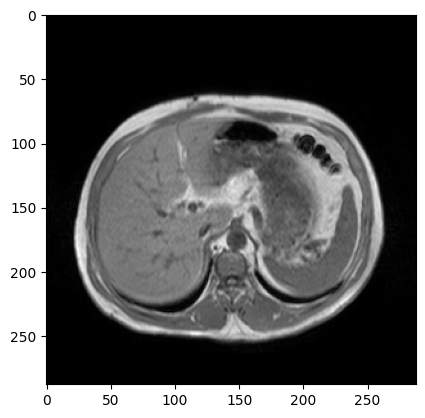

In [121]:
plt.imshow(ct_img, cmap = 'gray')

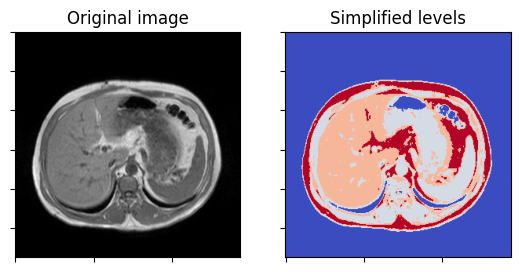

In [134]:
n_clusters = 4 # we want to segment 4 different classes
img = ct_img.reshape((-1,1)) # bacuse Kmeans wants this shape -> we obtain a vector. Each pixel is a data poinnt, with its intennsity value being the features
km = cluster.KMeans(n_clusters=n_clusters) # create a kmeans model
km.fit(img) # fit the model on our image data. common function to perform ML model training
values = km.cluster_centers_.squeeze()
labels = km.labels_

img_segm = np.choose(labels, values) # we replace each pixel with each cluster value

img_segm.shape = ct_img.shape


vmin = img.min()
vmax = img.max()

fig = plt.figure(1)
# Plot the original image
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(ct_img,cmap='gray', vmin=vmin, vmax=vmax)
ax1.set_title('Original image')

# Plot the simplified color image
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img_segm, cmap = 'coolwarm')
ax2.set_title('Simplified levels')

# Get rid of the tick labels
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax2.set_xticklabels([])
ax2.set_yticklabels([])

plt.show()

In [138]:
leaves_gray = leaves[:,:,0]

In [139]:

leaves_gray = cv2.resize(leaves_gray, (500, 500))

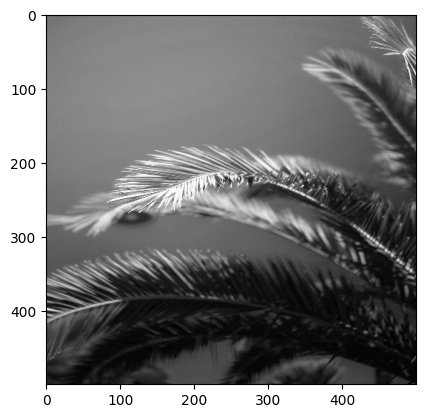

In [141]:
plt.imshow(leaves_gray, cmap = 'gray')

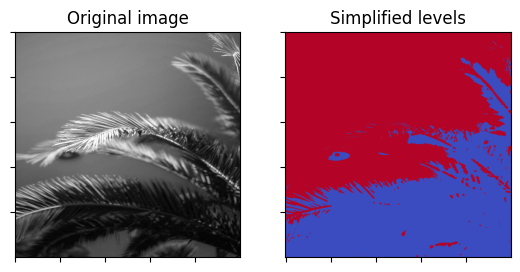

In [145]:
n_clusters = 2
img = leaves_gray.reshape((-1,1)) # bacuse Kmeans wants this shape -> we obtain a vector. Each pixel is a data poinnt, with its intennsity value being the features
km = cluster.KMeans(n_clusters=n_clusters) # create a kmeans model
km.fit(img) # fit the model on our image data. common function to perform ML model training
values = km.cluster_centers_.squeeze()
labels = km.labels_

img_segm = np.choose(labels, values) # we replace each pixel with each cluster value

img_segm.shape = leaves_gray.shape


vmin = img.min()
vmax = img.max()

fig = plt.figure(1)
# Plot the original image
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(leaves_gray,cmap='gray', vmin=vmin, vmax=vmax)
ax1.set_title('Original image')

# Plot the simplified color image
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img_segm, cmap = 'coolwarm')
ax2.set_title('Simplified levels')

# Get rid of the tick labels
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax2.set_xticklabels([])
ax2.set_yticklabels([])

plt.show()

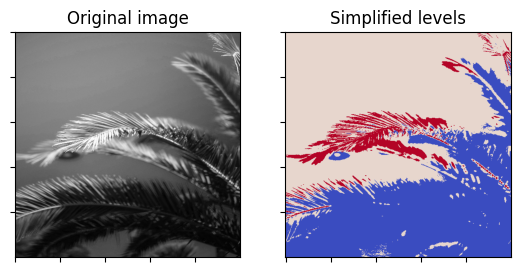

In [144]:

n_clusters = 3
img = leaves_gray.reshape((-1,1)) # bacuse Kmeans wants this shape -> we obtain a vector. Each pixel is a data poinnt, with its intennsity value being the features
km = cluster.KMeans(n_clusters=n_clusters) # create a kmeans model
km.fit(img) # fit the model on our image data. common function to perform ML model training
values = km.cluster_centers_.squeeze()
labels = km.labels_

img_segm = np.choose(labels, values) # we replace each pixel with each cluster value

img_segm.shape = leaves_gray.shape


vmin = img.min()
vmax = img.max()

fig = plt.figure(1)
# Plot the original image
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(leaves_gray,cmap='gray', vmin=vmin, vmax=vmax)
ax1.set_title('Original image')

# Plot the simplified color image
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img_segm, cmap = 'coolwarm')
ax2.set_title('Simplified levels')

# Get rid of the tick labels
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax2.set_xticklabels([])
ax2.set_yticklabels([])

plt.show()

In [133]:
print(np.unique(img_segm))

[  4.30064193 203.42647693 343.65243969]


### Region growing

In [155]:
ct_img_norm = (ct_img - np.min(ct_img)) / (np.max(ct_img) - np.min(ct_img))
print(ct_img_norm.max())

1.0


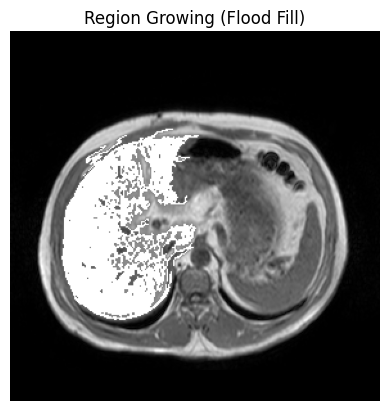

In [215]:
seed = (150, 70)

flood_filled_image = segmentation.flood_fill(ct_img_norm, seed, new_value=1, tolerance=0.05)


plt.imshow(flood_filled_image, cmap='gray')
plt.title("Region Growing (Flood Fill)")
plt.axis('off')
plt.show()

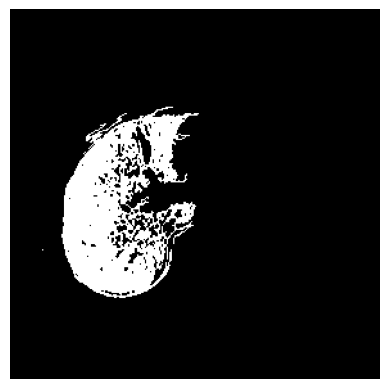

In [216]:
bin_ct = (flood_filled_image == 1)
plt.imshow(bin_ct, cmap='gray')
plt.axis('off')
plt.show()

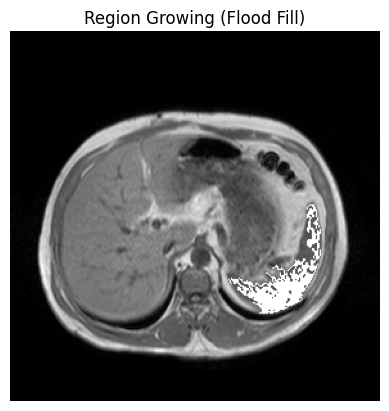

In [227]:
seed = (200, 200)

flood_filled_image = segmentation.flood_fill(ct_img_norm, seed, new_value=1, tolerance = 0.035)


plt.imshow(flood_filled_image, cmap='gray')
plt.title("Region Growing (Flood Fill)")
plt.axis('off')
plt.show()

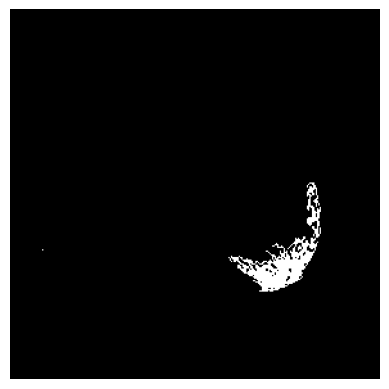

In [229]:
bin_ct_2 = (flood_filled_image == 1)
plt.imshow(bin_ct_2, cmap='gray')
plt.axis('off')
plt.show()

## Morphological operations

In [189]:
def dilation(img, kernel):
		kern_center = (kernel.shape[0]//2,kernel.shape[1]//2)
		kernel_ones_count = kernel.sum()
		dilated_img = np.zeros((img.shape[0]+kernel.shape[0]-1, img.shape[1]+kernel.shape[1]-1))
		img_shape = img.shape

		x_append = np.zeros((img.shape[0],kernel.shape[1]-1))
		img = np.append(img, x_append, axis=1)
		y_append = np.zeros((kernel.shape[0]-1,img.shape[1]))
		img = np.append(img, y_append, axis=0)

		for i in range(img_shape[0]):
			for j in range(img_shape[1]):
				i_ = i+kernel.shape[0]
				j_ = j+kernel.shape[1]
				if (kernel*img[i:i_,j:j_]).sum() != 0:
					dilated_img[i+kern_center[0],j+kern_center[1]] = 1

		return(dilated_img)

In [204]:
def erosion(img, kernel):
		kern_center = (kernel.shape[0]//2,kernel.shape[1]//2)
		kernel_ones_count = kernel.sum()
		eroded_img = np.zeros((img.shape[0]+kernel.shape[0]-1, img.shape[1]+kernel.shape[1]-1))
		img_shape = img.shape


		x_append = np.zeros((img.shape[0],kernel.shape[1]-1))
		img = np.append(img, x_append, axis=1)
		y_append = np.zeros((kernel.shape[0]-1,img.shape[1]))
		img = np.append(img, y_append, axis=0)

		#print(kernel_ones_count)

		for i in range(img_shape[0]):
			for j in range(img_shape[1]):
				i_ = i+kernel.shape[0]
				j_ = j+kernel.shape[1]
				if kernel_ones_count == (kernel*img[i:i_,j:j_]).sum()/1:
					eroded_img[i+kern_center[0],j+kern_center[1]] = 1

		return(eroded_img[:img_shape[0],:img_shape[1]])

def closing(img, kernel):
    dilated_img = dilation(img, kernel)
    closed_img = erosion(dilated_img, kernel)

    return(closed_img)

In [191]:
# define your structuring element
square3 = np.ones((3, 3), np.uint8)
square5 = np.ones((5, 5), np.uint8)

Text(0.5, 1.0, 'scratch, SE = 5')

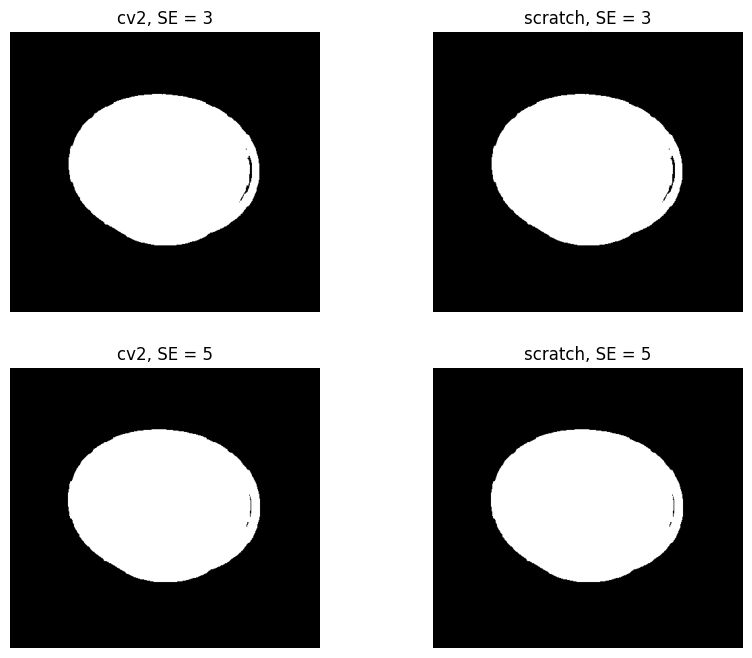

In [203]:
dilation_cv3 = cv2.dilate(cup_segmented[:,:,0], square3, iterations=1) # library function
dilation_scratch3 = dilation(cup_segmented[:,:,0], square3) # hand-crafted function

dilation_cv5 = cv2.dilate(cup_segmented[:,:,0], square5, iterations=1)
dilation_scratch5 = dilation(cup_segmented[:,:,0], square5)


fig=plt.figure(figsize=(10,8))

fig.add_subplot(2,2,1)
plt.imshow(dilation_cv3, cmap = 'gray')
plt.axis("off")
plt.title("cv2, SE = 3")

fig.add_subplot(2,2,2)
plt.imshow(dilation_scratch3, cmap = 'gray')
plt.axis("off")
plt.title("scratch, SE = 3")

fig.add_subplot(2,2,3)
plt.imshow(dilation_cv5, cmap = 'gray')
plt.axis("off")
plt.title("cv2, SE = 5")

fig.add_subplot(2,2,4)
plt.imshow(dilation_scratch5, cmap = 'gray')
plt.axis("off")
plt.title("scratch, SE = 5")

# Erosion

Text(0.5, 1.0, 'scratch, SE = 5')

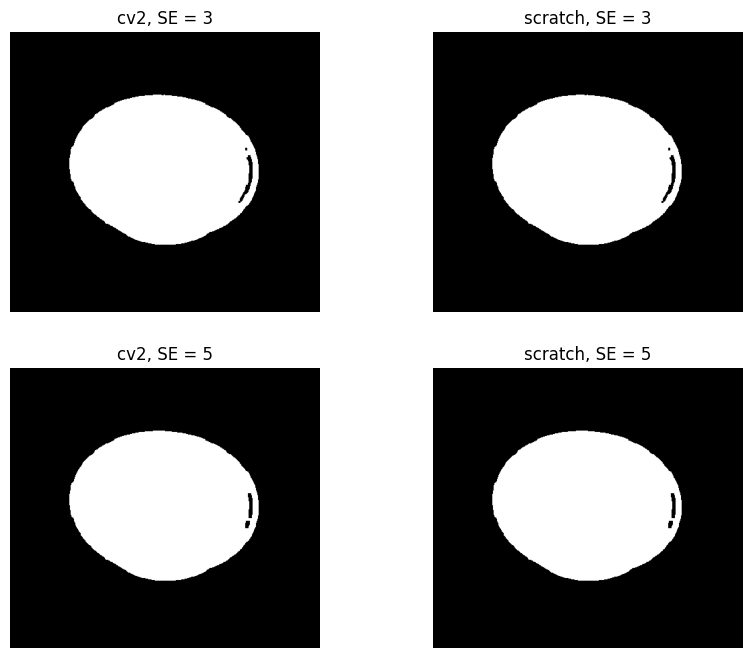

In [206]:
closing_cv3 = cv2.morphologyEx(cup_segmented[:, :, 0], cv2.MORPH_CLOSE, square3, iterations=1)
closing_scratch3 = closing(cup_segmented[:, :, 0], square3)

closing_cv5 = cv2.morphologyEx(cup_segmented[:, :, 0], cv2.MORPH_CLOSE, square5, iterations=1)
closing_scratch5 = closing(cup_segmented[:, :, 0], square5)

fig=plt.figure(figsize=(10,8))

fig.add_subplot(2,2,1)
plt.imshow(closing_cv3, cmap = 'gray')
plt.axis("off")
plt.title("cv2, SE = 3")

fig.add_subplot(2,2,2)
plt.imshow(closing_scratch3, cmap = 'gray')
plt.axis("off")
plt.title("scratch, SE = 3")

fig.add_subplot(2,2,3)
plt.imshow(closing_cv5, cmap = 'gray')
plt.axis("off")
plt.title("cv2, SE = 5")

fig.add_subplot(2,2,4)
plt.imshow(closing_scratch5, cmap = 'gray')
plt.axis("off")
plt.title("scratch, SE = 5")


In [232]:
print(hand_otsu.shape)

(1920, 1597, 3)


Text(0.5, 1.0, 'scratch, SE = 5')

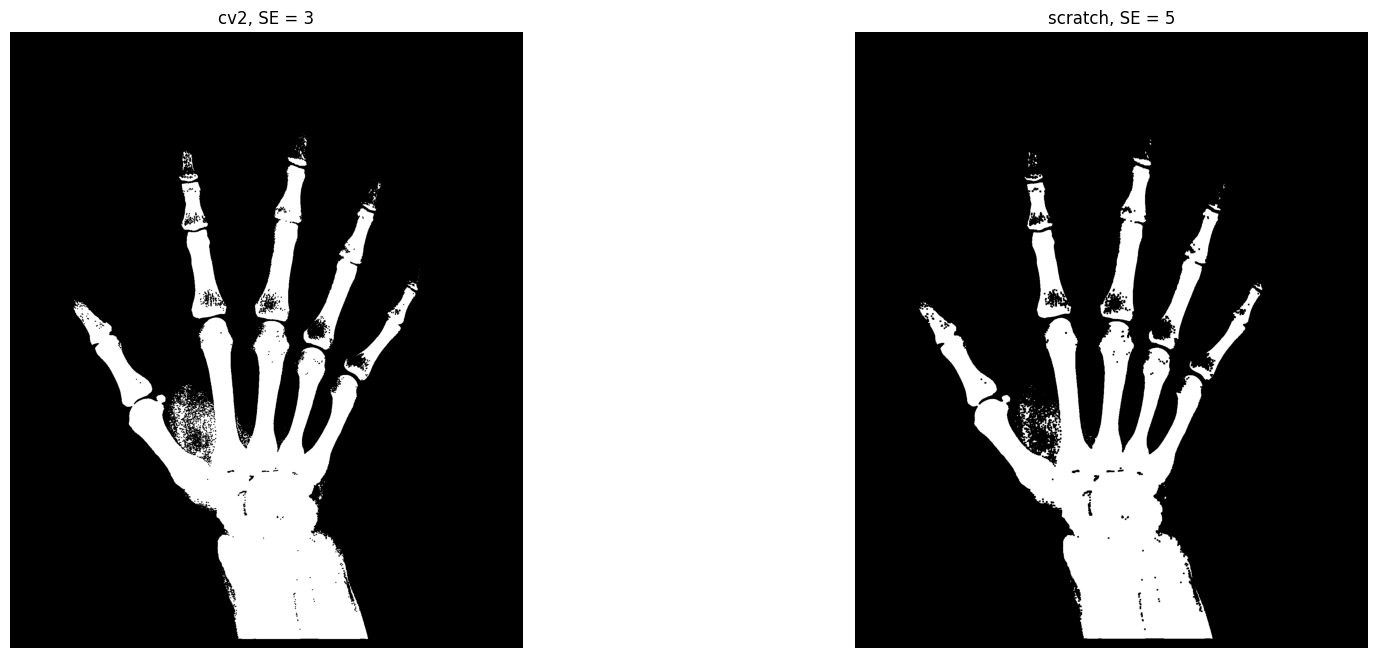

In [235]:
erosion_cv3 = cv2.erode(hand_otsu, square3, iterations=1)
erosion_cv5 = cv2.erode(hand_otsu, square5, iterations=1)

fig=plt.figure(figsize=(20,8))

fig.add_subplot(1,2,1)
plt.imshow(erosion_cv5, cmap = 'gray')
plt.axis("off")
plt.title("cv2, SE = 3")

fig.add_subplot(1,2,2)
plt.imshow(dilation_cv5, cmap = 'gray')
plt.axis("off")
plt.title("scratch, SE = 5")


/tmp/ipython-input-712763747.py:1: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  square_se = square(3)  # 3x3 square


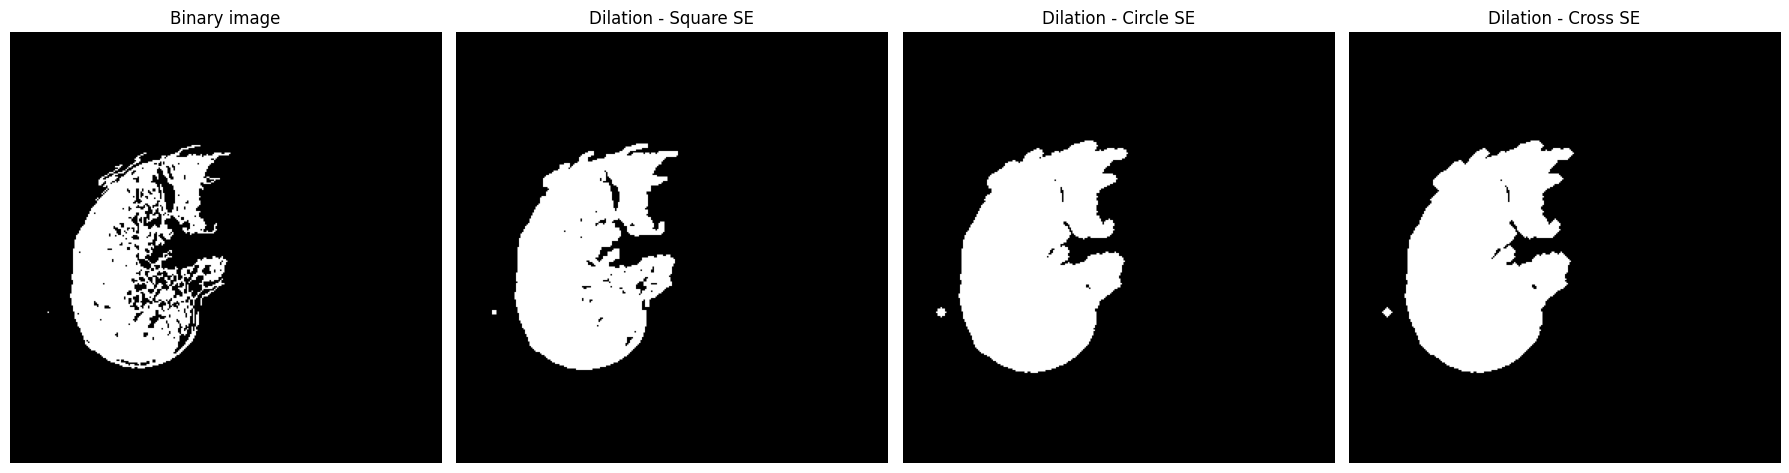

In [224]:
square_se = square(3)  # 3x3 square
circle_se = disk(3)    # 3x3 disk-shaped structuring element
cross_se = diamond(3)    # 3x3 cross-shaped structuring element

dilated_square = morphology.dilation(bin_ct, square_se)
dilated_circle = morphology.dilation(bin_ct, circle_se)
dilated_cross = morphology.dilation(bin_ct, cross_se)

fig, axs = plt.subplots(1, 4, figsize=(18, 10))

axs[0].imshow(bin_ct, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Binary image')


# square structuring element
axs[1].imshow(dilated_square, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Dilation - Square SE')

# circle structuring element
axs[2].imshow(dilated_circle, cmap='gray')
axs[2].axis('off')
axs[2].set_title('Dilation - Circle SE')

# cross structuring element
axs[3].imshow(dilated_cross, cmap='gray')
axs[3].axis('off')
axs[3].set_title('Dilation - Cross SE')

plt.tight_layout()
plt.show()


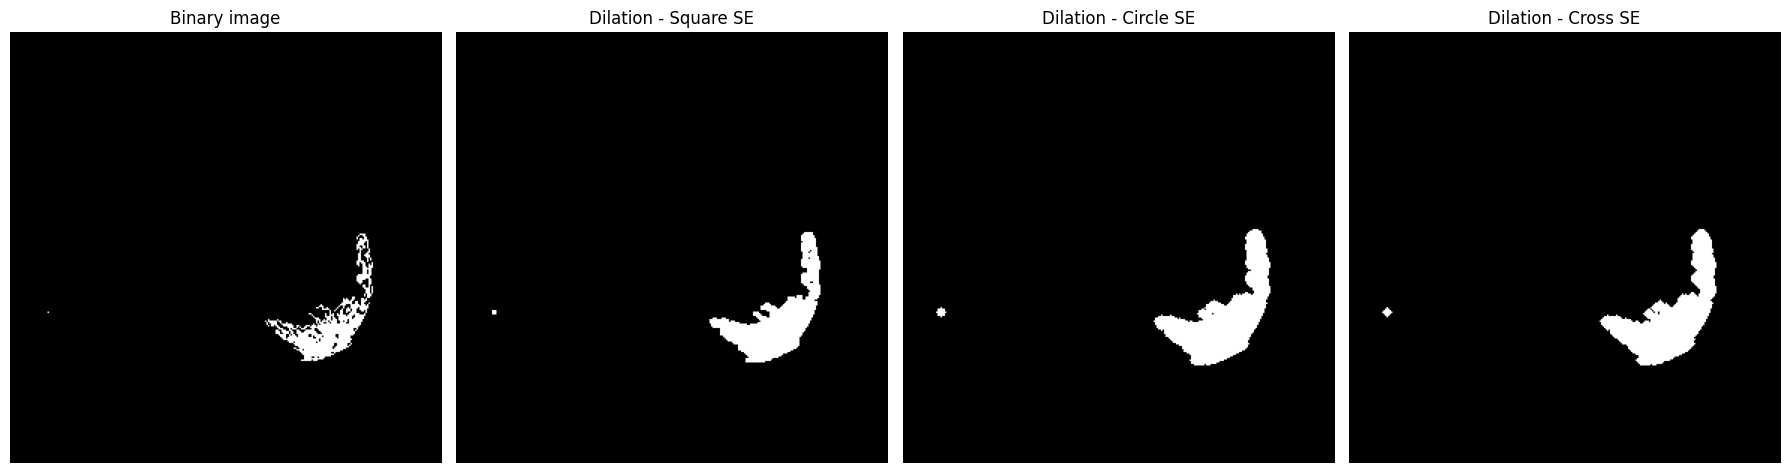

In [230]:
dilated_square = morphology.dilation(bin_ct_2, square_se)
dilated_circle = morphology.dilation(bin_ct_2, circle_se)
dilated_cross = morphology.dilation(bin_ct_2, cross_se)

fig, axs = plt.subplots(1, 4, figsize=(18, 10))

axs[0].imshow(bin_ct_2, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Binary image')


# square structuring element
axs[1].imshow(dilated_square, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Dilation - Square SE')

# circle structuring element
axs[2].imshow(dilated_circle, cmap='gray')
axs[2].axis('off')
axs[2].set_title('Dilation - Circle SE')

# cross structuring element
axs[3].imshow(dilated_cross, cmap='gray')
axs[3].axis('off')
axs[3].set_title('Dilation - Cross SE')

plt.tight_layout()
plt.show()